In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import os
from glob import glob

import cv2
import matplotlib.pyplot as plt
import nibabel as nib
from skimage import img_as_ubyte

import albumentations as A

In [2]:
#/kaggle/input/kits-data-reformed/
#/kaggle/input/kits-data-reformed/data_reformed/case_00000/images/0.npy

In [3]:
files = glob('/kaggle/input/kits-data-reformed/data_reformed/*/images/*') ###every case, then images, then everything inside images
#files = glob('/kaggle/input/kits-data-reformed/data_reformed/case_00000/images/*')
#../input/kits-data-reformed/data_reformed/*

#files = [img for img in data_reformed if img in images]

for file in files[:10]:
    print(file)

/kaggle/input/kits-data-reformed/data_reformed/case_00091/images/422.npy
/kaggle/input/kits-data-reformed/data_reformed/case_00091/images/331.npy
/kaggle/input/kits-data-reformed/data_reformed/case_00091/images/280.npy
/kaggle/input/kits-data-reformed/data_reformed/case_00091/images/100.npy
/kaggle/input/kits-data-reformed/data_reformed/case_00091/images/719.npy
/kaggle/input/kits-data-reformed/data_reformed/case_00091/images/193.npy
/kaggle/input/kits-data-reformed/data_reformed/case_00091/images/461.npy
/kaggle/input/kits-data-reformed/data_reformed/case_00091/images/63.npy
/kaggle/input/kits-data-reformed/data_reformed/case_00091/images/64.npy
/kaggle/input/kits-data-reformed/data_reformed/case_00091/images/253.npy


In [4]:
ints = [1, 3, 5, 3, 2, 8, -2]

sorted_ints = sorted(ints)
print(sorted_ints)

[-2, 1, 2, 3, 3, 5, 8]


In [5]:
for file in files:
    x = file.split('/')
    y = x[-1].split('.')
    print(x[-1])
    print(int(y[0]))
    break

422.npy
422


In [6]:
for file in files:
    x = file.split('/')
    y = x[-1].split('.')
    print(x[-1])
    print(int(y[0]))
    break

422.npy
422


In [7]:
def sort(files):
    
    sorted_file = []
    sorted_ints = []
    for file in files:
        #x = int(file.split('/')[-1].split('.')[0])
        x = file.split('/')
        #print(x)
        y = x[-1].split('.')[0]
        #print(y)
        sorted_ints.append(int(y))
    sorted_ints = sorted(sorted_ints)
    print(sorted_ints[:10])
    for idx in sorted_ints:
        base = f'/kaggle/input/kits-data-reformed/data_reformed/case_00000/images/{idx}.npy'         ### Load Data Notebook - Custom Sort
        sorted_file.append(base)
        
    return sorted_file
        
#split always returns a list    

In [8]:
sort(files)[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


['/kaggle/input/kits-data-reformed/data_reformed/case_00000/images/0.npy',
 '/kaggle/input/kits-data-reformed/data_reformed/case_00000/images/0.npy',
 '/kaggle/input/kits-data-reformed/data_reformed/case_00000/images/0.npy',
 '/kaggle/input/kits-data-reformed/data_reformed/case_00000/images/0.npy',
 '/kaggle/input/kits-data-reformed/data_reformed/case_00000/images/0.npy',
 '/kaggle/input/kits-data-reformed/data_reformed/case_00000/images/0.npy',
 '/kaggle/input/kits-data-reformed/data_reformed/case_00000/images/0.npy',
 '/kaggle/input/kits-data-reformed/data_reformed/case_00000/images/0.npy',
 '/kaggle/input/kits-data-reformed/data_reformed/case_00000/images/0.npy',
 '/kaggle/input/kits-data-reformed/data_reformed/case_00000/images/0.npy']

In [9]:
###load a numpy image
###And show a numpy image using matplotlib
###HackerRank python list, strings functions (split, join)
###How to fix custom_sort to work every 'case' in data_reformed

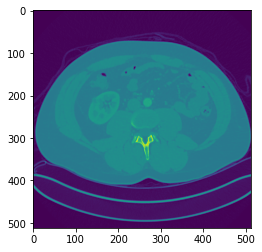

In [10]:
import matplotlib.pyplot as plt

for image in files:
    image = np.load(image)
    plt.imshow(image); plt.show()
    break

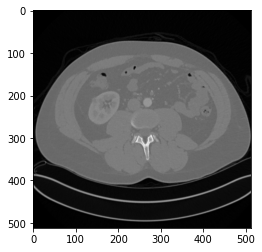

In [11]:
#When R,G,B color channels of an image are practically the same the image looks grayscale and [black and white]
plt.imshow(np.stack([image]*3, -1))

In [12]:
image.shape[0]

512

In [13]:
#Make the same shape as image
new_image = np.zeros([image.shape[0], image.shape[1], 3]).astype(image.dtype) #module
new_image[:, :, 0] = image[:, :]
new_image[:, :, 1] = image[:, :]
new_image[:, :, 2] = image[:, :]

In [14]:
new_image.shape

(512, 512, 3)

In [15]:
print(new_image.dtype)

uint8


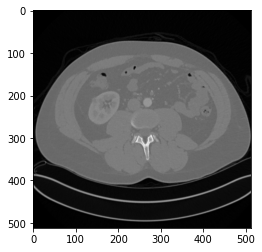

In [16]:
plt.imshow(new_image)

In [17]:
from albumentations import *

In [18]:
def augment(aug, image):
    return aug(image=image)['image']

In [19]:
from PIL import Image

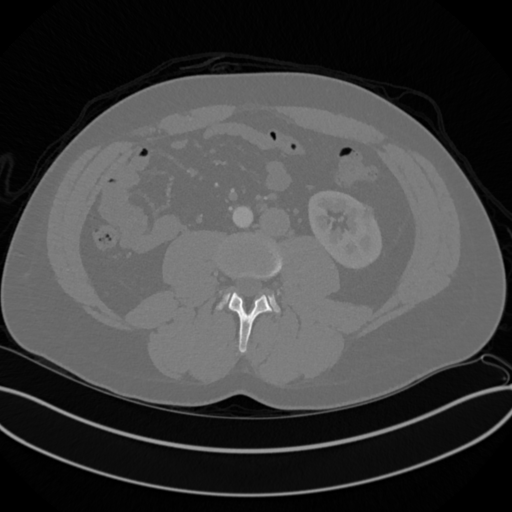

In [20]:
#Model needs to see in from perspectives
aug = HorizontalFlip(p=1)
Image.fromarray(augment(aug,np.array(new_image)))

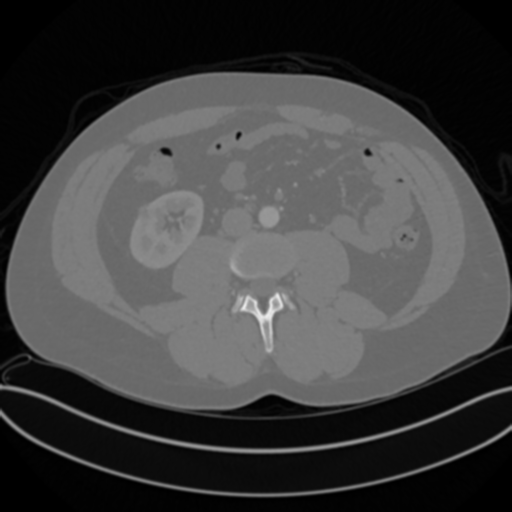

In [21]:
aug = Blur(p=1,blur_limit=3)
Image.fromarray(augment(aug,np.array(new_image)))

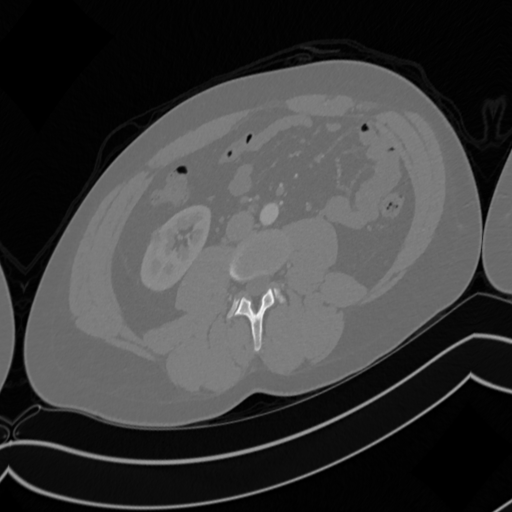

In [22]:
aug = ElasticTransform(p=1,border_mode=cv2.BORDER_REFLECT_101,alpha_affine=40)
Image.fromarray(augment(aug,np.array(new_image)))

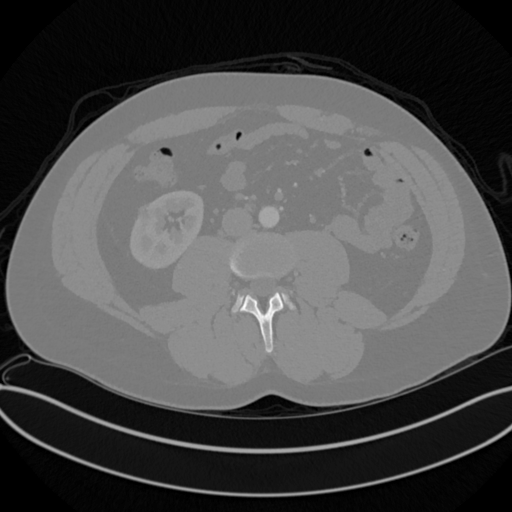

In [23]:
aug = RandomGamma(p=1)
Image.fromarray(augment(aug,np.array(new_image)))

/opt/conda/lib/python3.7/site-packages/albumentations/augmentations/transforms.py:1828: FutureWarning: This class has been deprecated. Please use RandomBrightnessContrast
  FutureWarning,


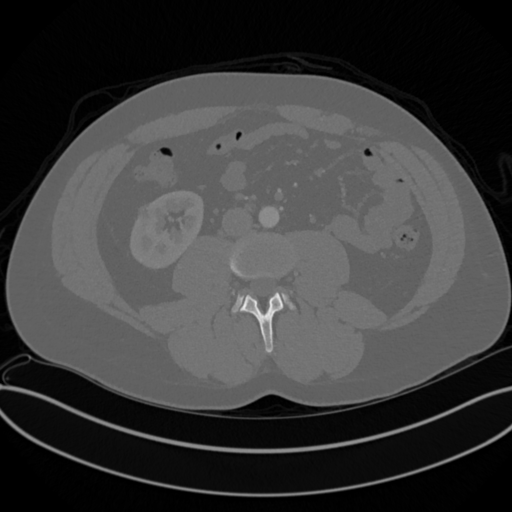

In [24]:
aug = RandomContrast(p=1)
Image.fromarray(augment(aug,np.array(new_image)))

/opt/conda/lib/python3.7/site-packages/albumentations/augmentations/transforms.py:1802: FutureWarning: This class has been deprecated. Please use RandomBrightnessContrast
  FutureWarning,


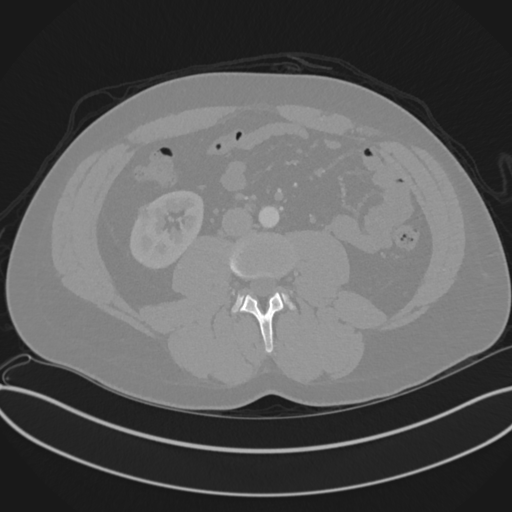

In [25]:
aug = RandomBrightness(p=1)
Image.fromarray(augment(aug,np.array(new_image)))

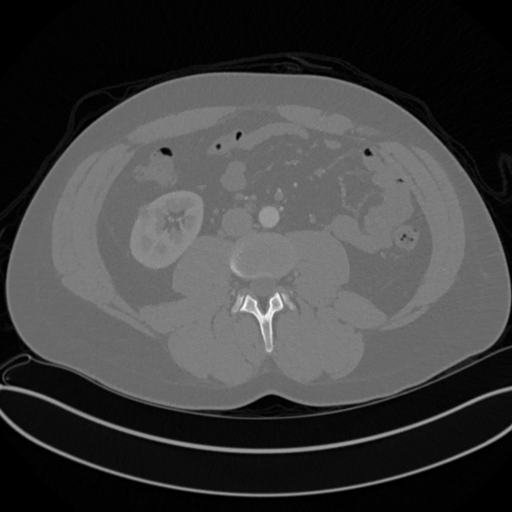

In [26]:
aug = ChannelShuffle(p=1)
Image.fromarray(augment(aug,np.array(new_image)))

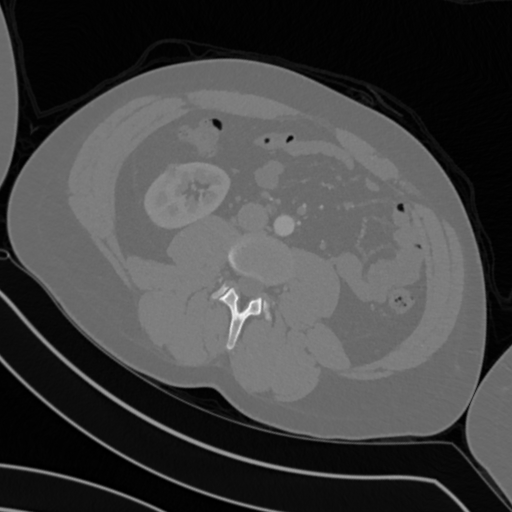

In [27]:
aug = Rotate(p=1,limit=30)
Image.fromarray(augment(aug,np.array(new_image)))

In [28]:
def strong_aug(p=1):
    return Compose([
        RandomRotate90(),
        Flip(),
        Transpose(),
        OneOf([
            IAAAdditiveGaussianNoise(),
            GaussNoise(),
        ], p=0.2),
        OneOf([
            MotionBlur(p=.2),
            MedianBlur(blur_limit=3, p=.1),
            Blur(blur_limit=3, p=.1),
        ], p=0.2),
        ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.2, rotate_limit=45, p=.2),
        OneOf([
            OpticalDistortion(p=0.3),
            GridDistortion(p=.1),
            IAAPiecewiseAffine(p=0.3),
        ], p=0.2),
        OneOf([
            CLAHE(clip_limit=2),
            IAASharpen(),
            IAAEmboss(),
            RandomContrast(),
            RandomBrightness(),
        ], p=0.3),
        #HueSaturationValue(p=0.3),
    ], p=p)

/opt/conda/lib/python3.7/site-packages/albumentations/imgaug/transforms.py:252: FutureWarning: IAAAdditiveGaussianNoise is deprecated. Please use GaussNoise instead
  warnings.warn("IAAAdditiveGaussianNoise is deprecated. Please use GaussNoise instead", FutureWarning)
/opt/conda/lib/python3.7/site-packages/albumentations/imgaug/transforms.py:290: FutureWarning: This IAAPiecewiseAffine is deprecated. Please use PiecewiseAffine instead
  warnings.warn("This IAAPiecewiseAffine is deprecated. Please use PiecewiseAffine instead", FutureWarning)
/opt/conda/lib/python3.7/site-packages/albumentations/imgaug/transforms.py:222: FutureWarning: IAASharpen is deprecated. Please use Sharpen instead
  warnings.warn("IAASharpen is deprecated. Please use Sharpen instead", FutureWarning)
/opt/conda/lib/python3.7/site-packages/albumentations/imgaug/transforms.py:165: FutureWarning: This augmentation is deprecated. Please use Emboss instead
  warnings.warn("This augmentation is deprecated. Please use Embo

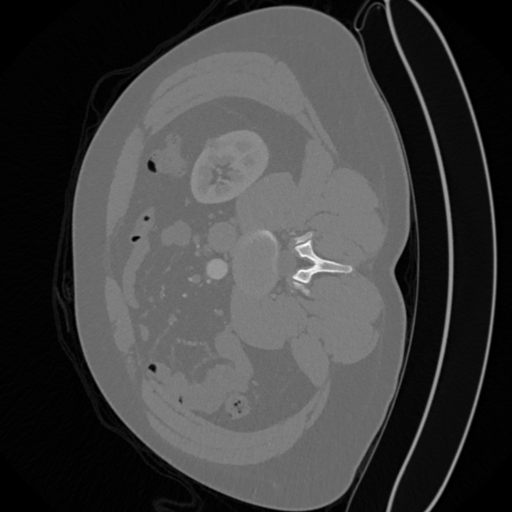

In [29]:
aug = strong_aug(p=1)
Image.fromarray(augment(aug,np.array(new_image)))